In [ ]:
import random
import math

def sample_normal(mu, sigma):
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
    return mu + sigma * z

def gibbs_sampling_2d_gaussian(mu_x, mu_y, sigma_x, sigma_y, rho, steps=1000):
    samples = []
    x, y = 0, 0

    for _ in range(steps):
        mu_x_given_y = mu_x + rho * sigma_x / sigma_y * (y - mu_y)
        sigma_x_given_y = sigma_x * math.sqrt(1 - rho**2)
        x = sample_normal(mu_x_given_y, sigma_x_given_y)

        mu_y_given_x = mu_y + rho * sigma_y / sigma_x * (x - mu_x)
        sigma_y_given_x = sigma_y * math.sqrt(1 - rho**2)
        y = sample_normal(mu_y_given_x, sigma_y_given_x)

        samples.append((x, y))

    return samples


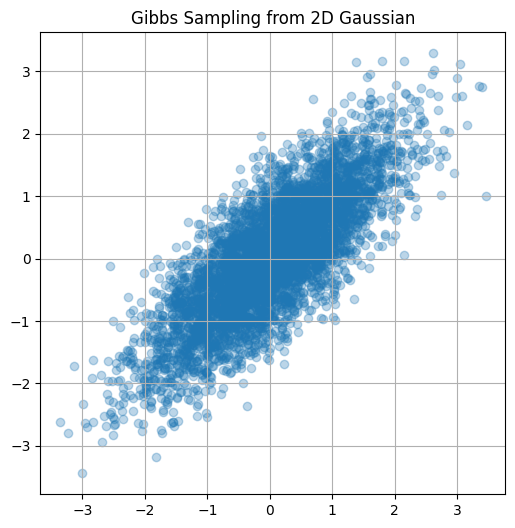

In [2]:
samples = gibbs_sampling_2d_gaussian(0, 0, 1, 1, 0.8, 5000)

import matplotlib.pyplot as plt

x_vals = [s[0] for s in samples]
y_vals = [s[1] for s in samples]

plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, alpha=0.3)
plt.title("Gibbs Sampling from 2D Gaussian")
plt.axis('equal')
plt.grid(True)
plt.show()
